In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import fiona
import shapely
import geopandas
import seaborn as sns
#import sklearn.cluster.DBSCAN
from datetime import datetime

def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [34]:
df = pd.read_csv('nyc_taxis.csv', low_memory=False)

In [35]:
def clean_IQR(df_in, columns= [' ', ' ', ' ', ' ', ' ', ' '],iqr_scale = 1.5,plot = False):
    temp_df = df_in.copy()
    
    # Filter the DataFrame for the current currency
    
    for column in columns:
        Q1 = float(temp_df[column].quantile(0.25))
        Q3 = float(temp_df[column].quantile(0.75))
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_scale * IQR
        upper_bound = Q3 + iqr_scale * IQR

        # Filter the data based on the calculated bounds
        temp_df = temp_df[(temp_df[column] >= lower_bound) & (temp_df[column] <= upper_bound)]
        if (plot):
            
            
            print("Entries removed",df_in.shape[0]-temp_df.shape[0])
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.hist(df_in[column], bins=10, edgecolor='black')
            plt.title(f'{column} Before Cleaning')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--', alpha=0.7)     
            
            plt.subplot(1, 2, 2)
            plt.hist(temp_df[column], bins=10, edgecolor='black')
            plt.title(f'{column} After Cleaning')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(True, linestyle='--', alpha=0.7)   
            
            plt.tight_layout()
            plt.show()            
    if plot:
        print("Entries before :",df_in.shape[0])
        print("Entries after :",temp_df.shape[0])
    # Update temp_df with the filtered country_df
    
    return temp_df      


#discussion still needed

In [36]:
# Question 2

# 1. Distance of trip
df['trip_distance_km'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                                      df['dropoff_longitude'], df['dropoff_latitude'])

# 2. Day of the week
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# 3. Average speed of trip
# Convert trip duration from seconds to hours
df['trip_duration_hours'] = df['trip_duration'] / 3600
df['average_speed_kmh'] = df['trip_distance_km'] / df['trip_duration_hours']

# Display the first few rows to check the new features
print(df[['trip_distance_km', 'day_of_week', 'average_speed_kmh']].head())

   trip_distance_km day_of_week  average_speed_kmh
0          1.497580      Monday          11.848984
1          1.804374      Sunday           9.797504
2          6.381090     Tuesday          10.815406
3          1.484566   Wednesday          12.457894
4          1.187842    Saturday           9.830418


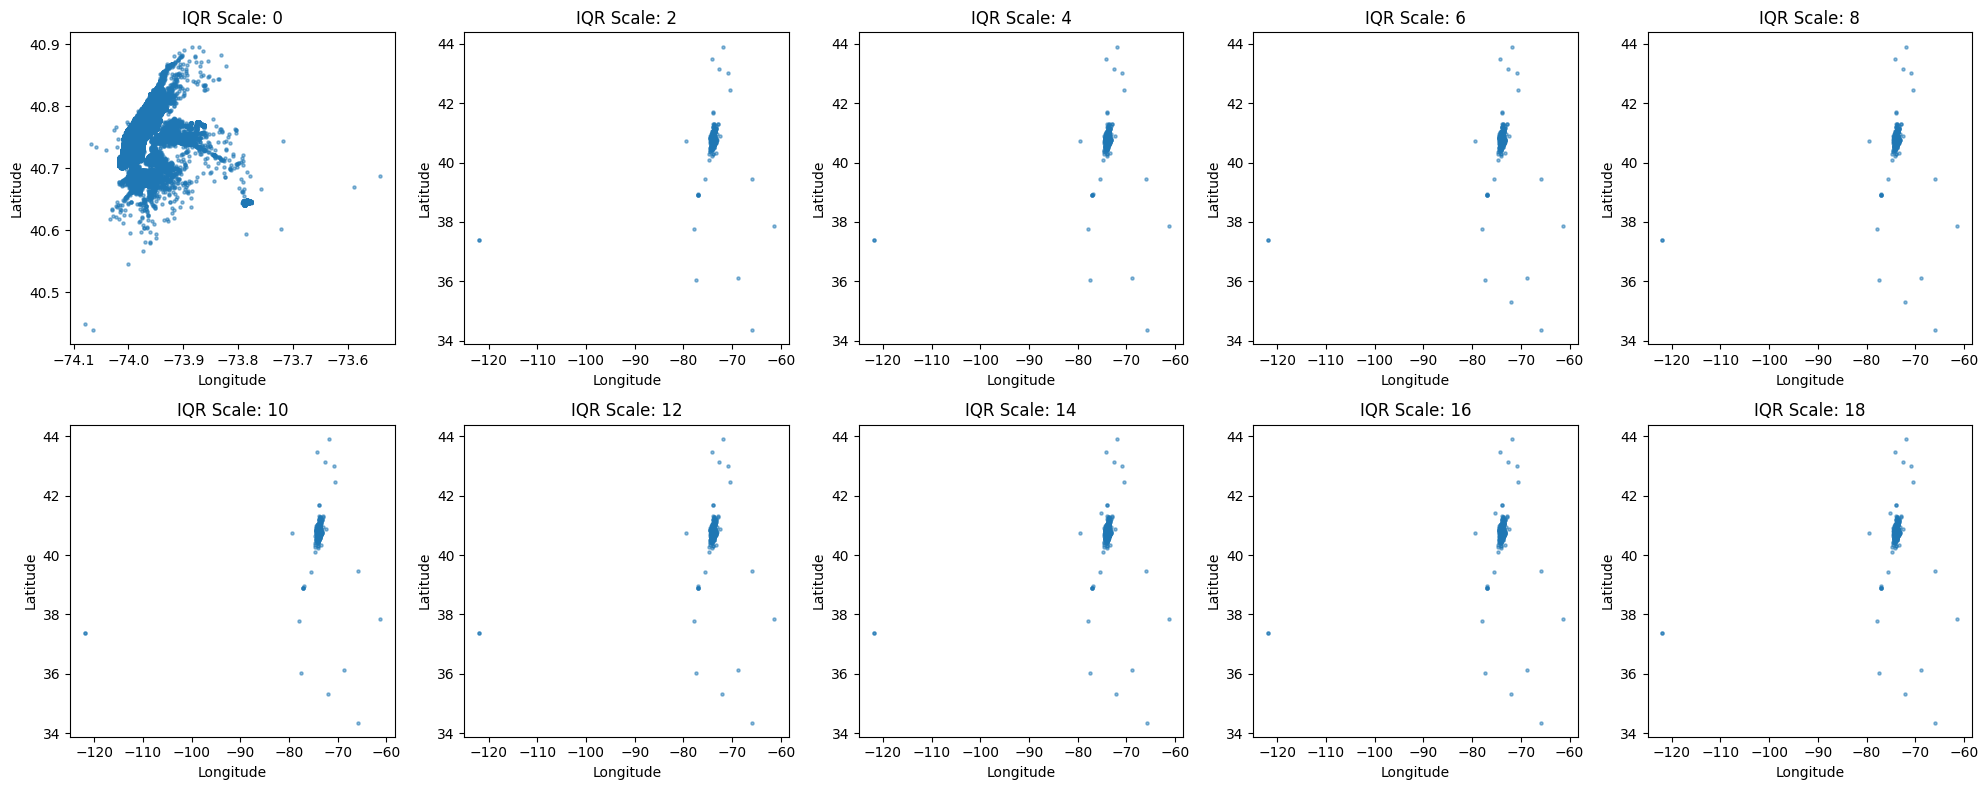

In [40]:
def clean_and_plot_iqr_ranges(df, columns, start=0, end=20, step=2):
    iqr_scales = [round(scale, 2) for scale in np.arange(start, end, step)]  # Adjusted range for 10 values
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
    axes = axes.flatten()

    for i, scale in enumerate(iqr_scales):
        # Clean data with current IQR scale
        df_cleaned = clean_IQR(df, columns=columns, iqr_scale=scale, plot=False)
        
        # Scatter plot of cleaned data using pickup_latitude and pickup_longitude
        axes[i].scatter(df_cleaned['pickup_longitude'], df_cleaned['pickup_latitude'], alpha=0.5, s=5)
        axes[i].set_title(f"IQR Scale: {scale}")
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')

    plt.tight_layout()
    plt.show()

clean_and_plot_iqr_ranges(df,['pickup_latitude','pickup_longitude','trip_duration','trip_distance_km'])

Entries removed 47548


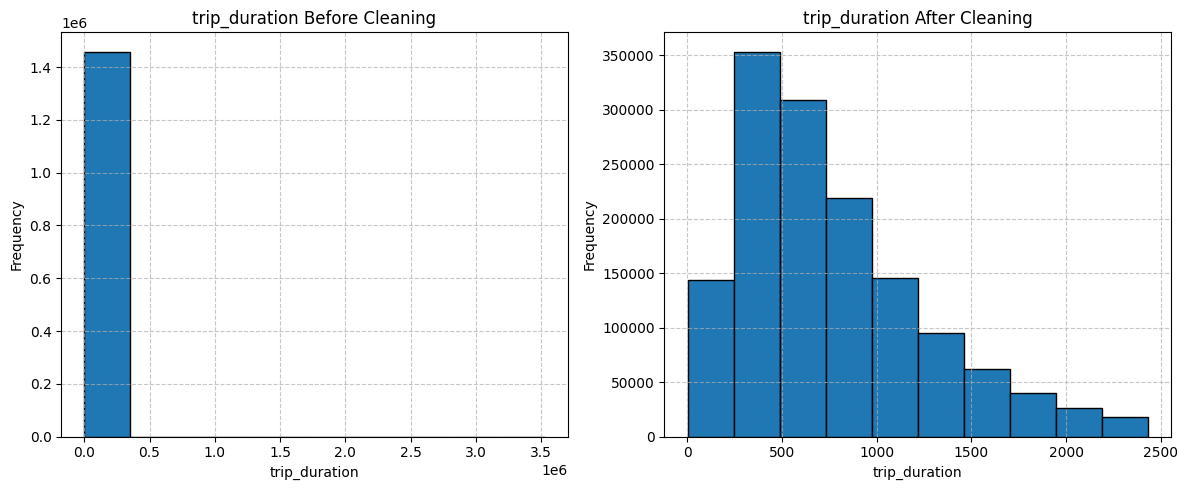

Entries before : 1458644
Entries after : 1411096


In [38]:

df['trip_duration'] = df['trip_duration'].astype(int)
df_cleaned = clean_IQR(df,columns=['trip_duration'],iqr_scale=2,plot=True)



